In [7]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import h5py
import requests

Found /Users/spaul2/Desktop/Jupyter Notebooks/MISR_AM1_CGAS_FIRSTLOOK_NOV_2019_F15_0032.nc on your system.
Skipping the download process from the ASDC OPeNDAP Service.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


ValueError: x and y must be the same size

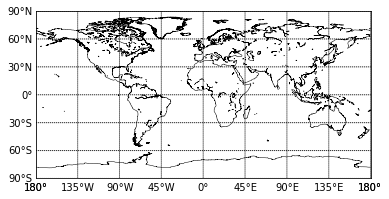

In [9]:
#should adapt so that you can download the file from the link like i have it for opendap 
#access from this link
#MI3MAENF file type - but it only goes up to 2017
#add link Kasey + Desiray sentFILE_NAME='MISR_AM1_AS_AEROSOL_P012_O045148_F13_0023.nc'
FILE_NAME='MISR_AM1_CGAS_FIRSTLOOK_NOV_2019_F15_0032.nc'
url = 'https://opendap.larc.nasa.gov:443/opendap/MISR/MI3MAENF.002/2019.11.01/MISR_AM1_CGAS_FIRSTLOOK_NOV_2019_F15_0032.nc'
if not os.path.isfile(FILE_NAME):
    try:
        print("Attempting to download: "+FILE_NAME+" from the ASDC OPeNDAP service...")
        r = requests.get(url, allow_redirects=True)
        open(FILE_NAME, 'wb').write(r.content)
        if os.path.isfile(FILE_NAME):
            print("Success! The full path to the data file is: "+os.path.abspath(FILE_NAME))
    except Exception as e:
            print("Error: " + str(e))
            
#If you have already downloaded the file and it is already on your machine, you will get a message telling you so
# and it will not be re-downloaded.

else:
    print('Found '+os.path.abspath(FILE_NAME)+' on your system.\nSkipping the download process from the ASDC OPeNDAP Service.')


with h5py.File(FILE_NAME, mode='r') as f:
    # Identify the data field - the below line can be modified 
    var = f['/Aerosol_Parameter_Average/Medium_Mode_Aerosol_Optical_Depth']
    # Read data.
    data = var[:]
    lat = f['/Aerosol_Parameter_Average/Latitude'][:]
    lon = f['/Aerosol_Parameter_Average/Longitude'][:]

    # Read attributes.
    # print(var.attrs.keys())

    #units = var.attrs['units']
    #long_name = var.attrs['long_name']

    # H5PY doesn't automatically turn the data into a masked array.
    fillvalue = var.attrs['_FillValue']
    data[data == fillvalue] = np.nan
    data = np.ma.masked_array(data, np.isnan(data))

    # The data is global, so render in a global projection.
    m = Basemap(projection='cyl', resolution='l',
                llcrnrlat=-90, urcrnrlat=90,
                llcrnrlon=-180, urcrnrlon=180)
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-90, 91, 30), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180, 181, 45), labels=[0, 0, 0, 1])
    m.scatter(lon, lat, c=data, s=0.1, cmap=plt.cm.jet,
              edgecolors=None, linewidth=0)
    cb = m.colorbar()
    cb.set_label(units)

    basename = os.path.basename(FILE_NAME)
    plt.title('{0}\n{1}'.format(basename, long_name), fontsize=8)
    fig = plt.gcf()
    plt.show()
    #pngfile = "{0}.py.png".format(basename)
    #fig.savefig(pngfile)